# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [4]:
# Dependencies and Setup
import pandas as pd
import requests
import hvplot               #HVPlot did not work for me. I stopped once the instructor mentioned it's no longer graded for HV PLOT.
import matplotlib.pyplot as plt

# Import API key
from api_keys import apikey_geo

In [13]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,tiksi,71.6366,128.8685,-24.95,96,100,4.59,RU,"Dec 05, 2022, Mon, 17:00"
1,1,souillac,44.8980,1.4694,2.29,82,67,1.63,FR,"Dec 05, 2022, Mon, 17:00"
2,2,paso de carrasco,-34.8640,-56.0538,27.06,61,0,5.66,UY,"Dec 05, 2022, Mon, 17:00"
3,3,lompoc,34.6392,-120.4579,17.74,64,0,5.66,US,"Dec 05, 2022, Mon, 17:00"
4,4,mahebourg,-20.4111,57.7061,24.21,88,75,4.63,MU,"Dec 05, 2022, Mon, 17:00"
...,...,...,...,...,...,...,...,...,...,...
579,579,chadan,32.6768,71.2812,15.83,34,65,1.07,PK,"Dec 05, 2022, Mon, 17:00"
580,580,pilar,32.6768,71.2812,15.83,34,65,1.07,PK,"Dec 05, 2022, Mon, 17:00"
581,581,vagay,32.6768,71.2812,15.83,34,65,1.07,PK,"Dec 05, 2022, Mon, 17:00"
582,582,port macquarie,32.6768,71.2812,15.83,34,65,1.07,PK,"Dec 05, 2022, Mon, 17:00"


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [6]:
# Narrow down cities that fit criteria and drop any results with null values

#Criteria::
#Max Temp = 29 > x > 12
#Lat 0 -> 45
#humidity <50%
# Drop any rows with null values


city_data_df = city_data_df.dropna()
city_data_df = city_data_df[city_data_df['Lat'] > 0]
city_data_df = city_data_df[city_data_df['Lat'] < 45]
city_data_df = city_data_df[city_data_df['Humidity'] < 50]
city_data_df = city_data_df[city_data_df['Max Temp'] < 29]
city_data_df = city_data_df[city_data_df['Max Temp'] > 12]

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
68,68,punta arenas,16.3406,-13.9481,28.08,29,36,2.84,SN,"Dec 05, 2022, Mon, 17:00"
84,84,ilulissat,17.5440,44.2247,14.59,36,0,1.13,SA,"Dec 05, 2022, Mon, 17:00"
85,85,kyaukse,22.8314,69.3508,21.68,33,0,5.43,IN,"Dec 05, 2022, Mon, 17:00"
99,99,belushya guba,11.0396,20.2826,24.54,23,49,3.20,TD,"Dec 05, 2022, Mon, 17:00"
115,115,gaya,16.5605,43.8900,12.77,38,0,1.95,YE,"Dec 05, 2022, Mon, 17:00"


### Step 3: Create a new DataFrame called `hotel_df`.

In [7]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = city_data_df.copy()
hotel_df = hotel_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']]
                    
hotel_df

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ''

# Display sample data
hotel_df = hotel_df.reset_index()
hotel_df.head()

,index,City,Country,Lat,Lng,Humidity,Hotel Name
0,68,punta arenas,SN,16.3406,-13.9481,29,
1,84,ilulissat,SA,17.5440,44.2247,36,
2,85,kyaukse,IN,22.8314,69.3508,33,
3,99,belushya guba,TD,11.0396,20.2826,23,
4,115,gaya,YE,16.5605,43.8900,38,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [8]:
# Set parameters to search for a hotel
radius = 10000
params = {
    # YOUR CODE HERE
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for i, row in hotel_df.iterrows():

    lat = hotel_df.iloc[i,3]  #0 to be index
    lng = hotel_df.iloc[i,4]  #0 to be index
    
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = lng, lat, radius
    params["bias"] = lng, lat
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places?"
    urla = 'categories=accommodation.hotel&'
    urlb = 'filter=circle:' + str(params["filter"][0]) + ',' + str(params['filter'][1]) + ',' + str(params['filter'][2])
    urlc = '&bias=proximity:' + str(params['bias'][0]) + ',' + str(params['bias'][1]) + '&limit=1&apiKey='

    # Make and API request using the params dictionaty
    name_address = "{}{}{}{}{}".format(base_url, urla, urlb, urlc, apikey_geo)
    
    # Convert the API response to JSON format
    response = requests.get(name_address)
    hotel_json = response.json()
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[i, "Hotel Name"] = hotel_json["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        hotel_df.loc[i, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[i, 'City']} - nearest hotel: {hotel_df.loc[i, 'Hotel Name']}")

print('Hotel Search complete!')   # Wanted to know when program finished.

Starting hotel search
punta arenas - nearest hotel: No hotel found
ilulissat - nearest hotel: فندق نجران
kyaukse - nearest hotel: rukmavati guest house
belushya guba - nearest hotel: Nimla
gaya - nearest hotel: No hotel found
kirakira - nearest hotel: فندق توات
palabuhanratu - nearest hotel: No hotel found
saskylakh - nearest hotel: No hotel found
hualmay - nearest hotel: No hotel found
lorengau - nearest hotel: La Fonda on the Plaza
santa fe - nearest hotel: فندق جالو السياحي
san patricio - nearest hotel: Peace Hotel
dalby - nearest hotel: Hotel de l'Amité
port-cartier - nearest hotel: No hotel found
mahadday weyne - nearest hotel: No hotel found
biloela - nearest hotel: Travelodge
lozuvatka - nearest hotel: No hotel found
manadhoo - nearest hotel: No hotel found
nakamura - nearest hotel: No hotel found
avera - nearest hotel: فندق سكليل
noumea - nearest hotel: Auberge le prestige
bambanglipuro - nearest hotel: No hotel found
puerto baquerizo moreno - nearest hotel: No hotel found
nuev

In [9]:
hotel_df.head()

,index,City,Country,Lat,Lng,Humidity,Hotel Name
0,68,punta arenas,SN,16.3406,-13.9481,29,No hotel found
1,84,ilulissat,SA,17.5440,44.2247,36,فندق نجران
2,85,kyaukse,IN,22.8314,69.3508,33,rukmavati guest house
3,99,belushya guba,TD,11.0396,20.2826,23,Nimla
4,115,gaya,YE,16.5605,43.8900,38,No hotel found


<AxesSubplot:xlabel='Lng', ylabel='Lat'>

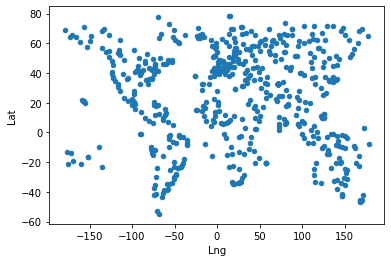

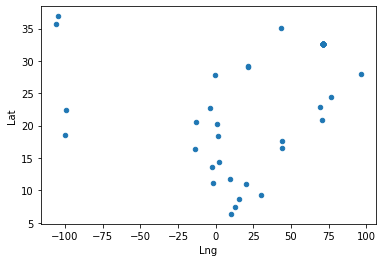

In [14]:
#HVPLOT Doesn't work and is not being graded for.
city_data_df.plot.scatter('Lng', 'Lat')
hotel_df.plot.scatter('Lng', 'Lat')

#Here are the two plots without the world background/hover over though! The first one looks cool.